In [ ]:
!pip install mxnet
!pip install d2l

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 KB 49.0 MB/s eta 0:00:00
     ━━━━━━━

# Chapter 3

## 3.1.6

### Exercise 2

1. Write out the optimization problem in matrix and vector notation (treat all the data as a single matrix, and all the target values as a single vector).

$L(w,b) = \frac{1}{n} \sum_{i=1}^n l^{(i)} (w,b)$

$= \frac{1}{n} \sum_{i=1}^n \frac{1}{2} (w^Tx^{(i)} + b - y^{(i)})^2$

$\sum^n_{i=1}w^Tx = Xw$

$L(w,b) = \frac{1}{n}\frac{1}{2}(Xw + b - y)^2$

We can ignore b

$L(w,b) = \frac{1}{n}\frac{1}{2}(Xw - y)^2$

2. Compute the gradient of the loss with respect to  w .

Gradient = derivative (with respect to w)

$L'(w,b) = \frac{1}{n}(Xw-y) \cdot X$

3. Find the analytic solution by setting the gradient equal to zero and solving the matrix equation.

$L'(w,b) = \frac{1}{n}(Xw-y) \cdot X = 0$

$\frac{1}{n}(Xw-y) \cdot X = 0$

$\frac{1}{n} = 0 ~\lor Xw-y = 0 ~\lor X = 0$

$\frac{1}{n}$ and $X$ can't be zero, therefore, $Xw-y = 0$

Multiply everything with $X^T$

$X^TXw-X^Ty = 0$

$X^TXw = X^Ty$

$w = \frac{X^Ty}{X^TX}$

4. When might this be better than using stochastic gradient descent? When might this method break?

This method is non-iterative and it's a normal equation, therefore it works better than stochastic gradient descent when we have relatively small data sets (under 10000). The method might break if the size gets bigger, because it has a time-complexity of $O(n^3)$

## 3.2.9

### Exercise 1

In [ ]:
%matplotlib inline
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

In [ ]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: [-0.40820047  0.269103  ] 
label: [2.4686852]


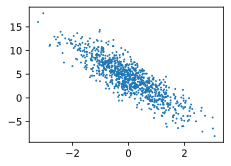

In [ ]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1);

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[-1.4809217   0.72710687]
 [ 1.226549   -0.90347075]
 [-0.3467976  -1.3021036 ]
 [-1.3278828   1.0101421 ]
 [-1.0084608  -0.2239856 ]
 [-0.20019844  1.309971  ]
 [-0.2857627   0.48003912]
 [-1.5010098   0.53308934]
 [-0.5283808   0.608962  ]
 [ 0.5230118  -1.0331728 ]] 
 [[-1.240726  ]
 [ 9.713224  ]
 [ 7.939219  ]
 [-1.8907793 ]
 [ 2.9564474 ]
 [-0.64790833]
 [ 1.9913751 ]
 [-0.6140817 ]
 [ 1.0734513 ]
 [ 8.755541  ]]


In [ ]:
w = np.random.normal(0, 0.01, (2, 1))
w[0] = 0
w[1] = 0
print(w)
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

[[0.]
 [0.]]


In [ ]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return np.dot(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Because `l` has a shape (`batch_size`, 1) and is not a scalar
        # variable, the elements in `l` are added together to obtain a new
        # variable, on which gradients with respect to [`w`, `b`] are computed
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.024994
epoch 2, loss 0.000088
epoch 3, loss 0.000051


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [6.1988831e-05 3.8313866e-04]
error in estimating b: [0.00083876]


The epoch and the errors change, but the algorithm still works.

### Exercise 6

In [ ]:
lr = 0.003
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Because `l` has a shape (`batch_size`, 1) and is not a scalar
        # variable, the elements in `l` are added together to obtain a new
        # variable, on which gradients with respect to [`w`, `b`] are computed
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 9.162902
epoch 2, loss 4.959511
epoch 3, loss 2.687338


In [ ]:
lr = 0.3
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Because `l` has a shape (`batch_size`, 1) and is not a scalar
        # variable, the elements in `l` are added together to obtain a new
        # variable, on which gradients with respect to [`w`, `b`] are computed
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000048
epoch 3, loss 0.000050


So if the learning rate is smaller, the loss function value starts higher, but drops quicker.

## 3.6.9

### Exercise 1

In [ ]:
import math
print(math.exp(50))

5.184705528587072e+21


$e^{50}$ is a very big number (see above), so if you want to compute the softmax of a very large x, 100000 for example, this will take very long/not be possible, especially since softmax also makes use of a sum of multiple exponentials, and therefore that number will be way bigger than $e^{50}$ and it might not be able to compute that using python.

### Exercise 4

No, it is not, because most likely means that there is a big chance that it is correct, but there also still is a chance that it is incorrect. Therefore, especially if the chance that the most likely label is correct is low, it might be smart to list all possible labels together with the chance of correctness. This way, a doctor, for the medical diagnosis case, can see the different options and use this information to get to the (hopefully) correct diagnosis.

# Chapter 4

## 4.2.7

### Exercise 1

In [ ]:
from mxnet import gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

In [ ]:
def relu(X):
    return np.maximum(X, 0)

In [ ]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    return np.dot(H, W2) + b2

In [ ]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

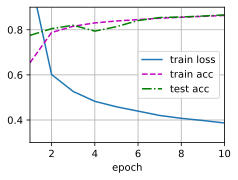

In [ ]:
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

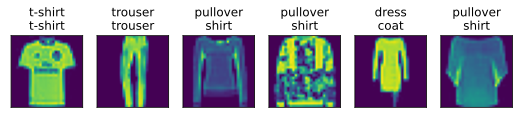

In [ ]:
d2l.predict_ch3(net, test_iter)

For num_hiddens = 256: 5 out of 6 correct

For num_hiddens = 512: 4 out of 6 correct

For num_hiddens = 128: 2 out of 6 correct

So 256 is the best value for num_hiddens

### Exercise 2

In [ ]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens1))
b1 = np.zeros(num_hiddens1)
W2 = np.random.normal(scale=0.01, size=(num_hiddens1, num_hiddens2))
b2 = np.zeros(num_hiddens2)
W3 = np.random.normal(scale=0.01, size=(num_hiddens2, num_outputs))
b3 = np.zeros(num_outputs)
params = [W1, b1, W2, b2, W3, b3]

for param in params:
    param.attach_grad()

In [ ]:
def relu(X):
    return np.maximum(X, 0)

In [ ]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = relu(np.dot(X, W1) + b1)
    H2 = relu(np.dot(H1, W2) + b2)
    return np.dot(H2, W3) + b3

In [ ]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

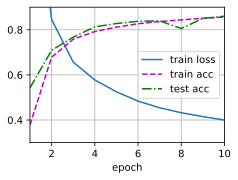

In [ ]:
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

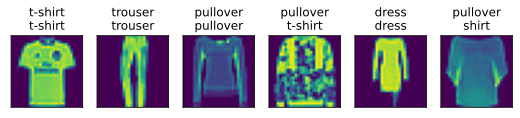

In [ ]:
d2l.predict_ch3(net, test_iter)

At the first few epochs, the train and test accuracy are way lower than before the extra hidden layer was added.

### Exercise 3

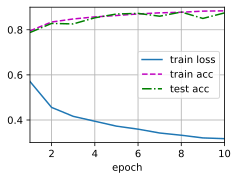

In [ ]:
num_epochs, lr = 10, 0.3
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

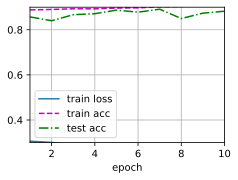

In [ ]:
num_epochs, lr = 10, 0.3
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

The higher the learning rate, the higher the accuracy. For learning rate = 0.3, num_epochs = 10, and epoch = 7, it gives the best result, namely 1,0.

## 4.3.3

### Exercise 2

In [ ]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

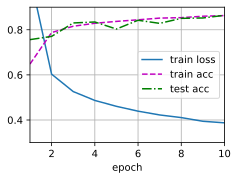

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='sigmoid'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

AssertionError: 0.5060648893992106

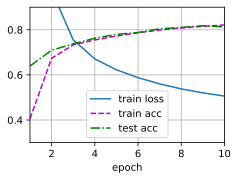

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='tanh'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

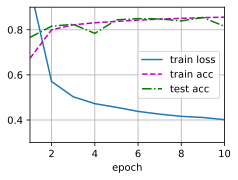

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

The logistic (sigmoid) activation function gives an error, so that one definitely does not work best. Then the rectified linear activation (relu) and the hyperbolic tangent (tanh) are left. In general, the tanh method works better, except for the values 4, 8 and 10 for epoch, as the test accuracy is here better for that method.

## 4.5.6

### Exercise 1

In [ ]:
%matplotlib inline
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [ ]:
def init_params():
    w = np.random.normal(scale=1, size=(num_inputs, 1))
    b = np.zeros(1)
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [ ]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [ ]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added, and broadcasting
                # makes `l2_penalty(w)` a vector whose length is `batch_size`
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', np.linalg.norm(w))

L2 norm of w: 13.416482


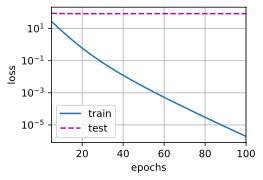

In [ ]:
train(lambd=0)

L2 norm of w: 0.10715494


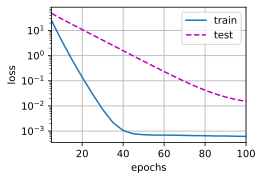

In [ ]:
train(lambd=4)

L2 norm of w: 0.028678603


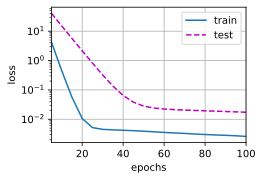

In [ ]:
train(lambd=8)

L2 norm of w: 0.0139532145


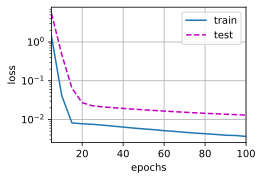

In [ ]:
train(lambd=20)

The bigger the lambda, the higher the training error, and the lower the test error. This is what we want, as we want to minimize the test error. However, it seems like there is a limit for the testing data (between $10^{-1}$ and $10^{-2}$)

## 4.6.7

### Exercise 4

While testing, you want to make use of all capacities/capabilities of the neural network, so therefore you do not want to apply dropout, as this means that you (temporarily) can't make use of certain neurons (as they are dropped), which means that the performance rate will probably be slower.

## 4.7.6

### Exercise 2

$z = W^{(1)}x + b$

$h = \phi(z)$

$o = W^{2}h$

$L = l(o,y)$

$s = \frac{\lambda}{2}(||W^{(1)} ||^2_F + ||W^{(2)} ||^2_F)$

$J = L + s$

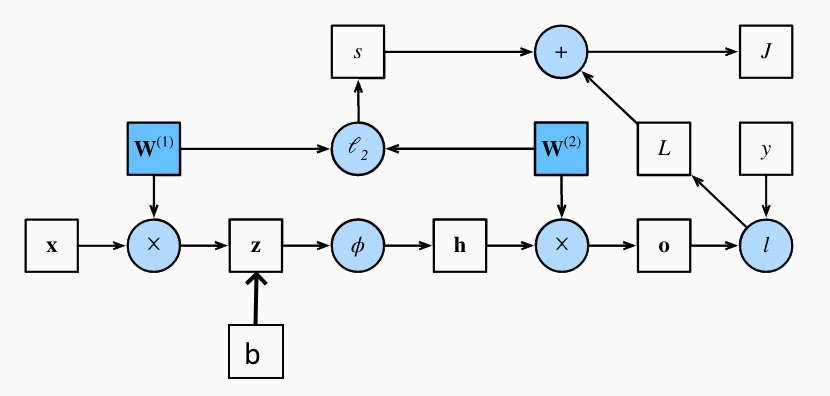

In [ ]:
from IPython import display
display.Image("4.7.6.2.jpg")

$\frac{dJ}{db_2} = \frac{dJ}{dL} * \frac{dL}{do} * \frac{do}{db_2}$

$= 1 * 2(o-y) * 1$

$=2(o-y)$

$\frac{dJ}{db_1} = \frac{dJ}{dL} * \frac{dL}{do} * \frac{do}{dh} * \frac{dh}{dz} * \frac{dz}{db_1}$

$= 1 * 2(o-y) * w_2 * \phi'(z) * 1$

$= 2(o-y) * w_2 * \phi'(z)$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fe3766d-856a-4afc-bcdc-378bd7292fd8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>